In [243]:
ls

Dataset/                            nutrition.tar.gb
Dataset-20221105T032922Z-001.zip    nutrition.tar.gz
dataset.h5                          nutrition.tar.zip
fruit.h5                            Sprint-2.ipynb
fruits.h5                           TEST_SET-20221105T035009Z-001.zip
nutrition-classification-model.tgz  train.h5
nutrition.h5                        TRAIN_SET/
nutrition.tar.biz                   TRAIN_SET.zip
nutrition.tar.bz                    Untitled0.ipynb


In [ ]:
cd /content/drive/MyDrive/CNN

/content/drive/MyDrive/CNN


In [ ]:
pwd

'/content/drive/MyDrive/CNN'

In [ ]:

!unzip TRAIN_SET.zip


Archive:  TRAIN_SET.zip
replace TRAIN_SET/APPLES/0_100.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: TRAIN_SET/APPLES/0_100.jpg  
  inflating: TRAIN_SET/APPLES/1_100.jpg  
  inflating: TRAIN_SET/APPLES/10_100.jpg  
  inflating: TRAIN_SET/APPLES/100_100.jpg  
  inflating: TRAIN_SET/APPLES/101_100.jpg  
  inflating: TRAIN_SET/APPLES/102_100.jpg  
  inflating: TRAIN_SET/APPLES/103_100.jpg  
  inflating: TRAIN_SET/APPLES/104_100.jpg  
  inflating: TRAIN_SET/APPLES/105_100.jpg  
  inflating: TRAIN_SET/APPLES/106_100.jpg  
  inflating: TRAIN_SET/APPLES/107_100.jpg  
  inflating: TRAIN_SET/APPLES/108_100.jpg  
  inflating: TRAIN_SET/APPLES/109_100.jpg  
  inflating: TRAIN_SET/APPLES/11_100.jpg  
  inflating: TRAIN_SET/APPLES/110_100.jpg  
  inflating: TRAIN_SET/APPLES/111_100.jpg  
  inflating: TRAIN_SET/APPLES/112_100.jpg  
  inflating: TRAIN_SET/APPLES/113_100.jpg  
  inflating: TRAIN_SET/APPLES/114_100.jpg  
  inflating: TRAIN_SET/APPLES/115_100.jpg  
  inflating: TRAIN_SET/APP

In [ ]:
!unzip /content/drive/MyDrive/CNN/Dataset-20221105T032922Z-001.zip

Archive:  /content/drive/MyDrive/CNN/Dataset-20221105T032922Z-001.zip
replace Dataset/TEST_SET/APPLES/r_184_100.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Dataset/TEST_SET/APPLES/r_184_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_27_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_121_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_26_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_19_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_31_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_183_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_105_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_124_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_29_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_17_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_112_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_23_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_28_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_24_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_106_100.jpg  
  in

Image Augumentation


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator#scaling,zooming

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.2,horizontal_flip=True,vertical_flip=True)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

 Applying Image data generator functionality to training set and testing set

In [ ]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN/TRAIN_SET",target_size=(64,64),class_mode="categorical",batch_size=24)

Found 2626 images belonging to 5 classes.


In [ ]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN/Dataset",target_size=(64,64),class_mode="categorical",batch_size=24)

Found 1055 images belonging to 1 classes.


In [ ]:
x_train.class_indices

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}

**SPRINT-2**:MODEL BUILDING AND TESTING

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout

Initializing the Model

In [ ]:
model=Sequential()

Creating the Model

In [ ]:
model.add(Conv2D(32,(3,3),activation="relu",strides=(1,1),input_shape=(64,64,3)))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(300,activation="relu"))
model.add(Dense(300,activation="relu"))

In [ ]:
model.add(Dense(5,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 300)               9225900   
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 5)                 1505      
                                                        

In [ ]:
model.add(Dense(300,activation='relu'))
model.add(Dense(300,activation='relu'))

In [ ]:
model.add(Dense(4,activation='softmax'))

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [ ]:
len(x_train)

110

In [ ]:
model.fit(x_train,epochs=10,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test))

Epoch 1/10
110/110 [==============================] - 27s 242ms/step - loss: 0.4205 - accuracy: 0.8861 - val_loss: 48.9065 - val_accuracy: 0.1488
Epoch 2/10
110/110 [==============================] - 27s 245ms/step - loss: 0.0082 - accuracy: 0.9989 - val_loss: 62.1670 - val_accuracy: 0.1280
Epoch 3/10
110/110 [==============================] - 28s 255ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 66.6759 - val_accuracy: 0.1488
Epoch 4/10
110/110 [==============================] - 27s 242ms/step - loss: 3.3364e-04 - accuracy: 1.0000 - val_loss: 70.6794 - val_accuracy: 0.1488
Epoch 5/10
110/110 [==============================] - 27s 248ms/step - loss: 1.9990e-04 - accuracy: 1.0000 - val_loss: 74.1865 - val_accuracy: 0.1488
Epoch 6/10
110/110 [==============================] - 26s 236ms/step - loss: 4.5090e-04 - accuracy: 1.0000 - val_loss: 75.5190 - val_accuracy: 0.1308
Epoch 7/10
110/110 [==============================] - 27s 248ms/step - loss: 1.0600e-04 - accuracy: 1.0000 - val

Saving the Model

In [ ]:
model.save('train.h5')

In [ ]:
model.save('dataset.h5')

In [ ]:
model.save('fruits.h5')


In [ ]:
model.save('nutrition.h5')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model=load_model('train.h5')

In [ ]:
model=load_model('dataset.h5')

In [ ]:
model=load_model('fruits.h5')

In [ ]:
model=load_model('nutrition.h5')

In [ ]:
!tar zcvf nutrition-classification-model.tgz nutrition.h5

nutrition.h5


# Connecting with IBM Cloud


Train the model on IBM
Cloud Deployment

In [ ]:
!pip install watson-machine-learning-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 31.7 MB/s 
     |████████████████████████████████| 55 kB 3.8 MB/s 
     |████████████████████████████████| 132 kB 76.2 MB/s 
     |████████████████████████████████| 9.9 MB 42.9 MB/s 
     |████████████████████████████████| 79 kB 7.6 MB/s 
     |████████████████████████████████| 140 kB 22.9 MB/s 
     |████████████████████████████████| 956 kB 60.8 MB/s 
     |████████████████████████████████| 135 kB 66.8 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73931 sha256=15829dd1dd877a706472b569725bbe2eeecbdf32bebcfbfc31597d39cdd7b4cd
  Stored in directory: /root/.cache/pip/wheels/ec/94/29/2b57327cf00664b6614304f7958abd29d77ea0e5bbece2ea57
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.12.0-py3-none-any.whl size=562962 sha256=77eaa2d91b

In [ ]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 27.3 MB/s 
     |████████████████████████████████| 51 kB 713 kB/s 
     |████████████████████████████████| 824 kB 61.9 MB/s 
     |████████████████████████████████| 133 kB 67.4 MB/s 
     |████████████████████████████████| 547 kB 69.4 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=6005cc48d89e63006a70b961941545b7014a103062eb61446dbccc4b34eebac8
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=131c9d3373b4c9a7f90286881e1f567f55baf44cd2d7b747df1f6fa5da2983cc
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos

In [ ]:
from ibm_watson_machine_learning import APIClient

In [ ]:
wml_credentials = {
    "url" : "https://eu-de.ml.cloud.ibm.com",
    "apikey" : "V8hik2Q5eS1s_K8jZ72O5X-READkcQBr_qVGtJ37by5j"
    
}

In [ ]:
client = APIClient(wml_credentials)

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [ ]:
client

In [ ]:
client.spaces.list(50)

------------------------------------  ---------  ------------------------
ID                                    NAME       CREATED
34050180-23c9-44f5-8800-32db49349e5d  nutrition  2022-11-11T07:33:27.438Z
------------------------------------  ---------  ------------------------


In [ ]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:eu-de:a/eb0a09c9a4b84a999a2f55a11273104a:7ddc9f3b-3f88-47f7-82c4-59fe493c461f::',
      'guid': '7ddc9f3b-3f88-47f7-82c4-59fe493c461f',
      'name': 'Watson Machine Learning-os',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'nutrition',
    'scope': {'bss_account_id': 'eb0a09c9a4b84a999a2f55a11273104a'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': 'ef20fd22-5bbb-4e1f-840c-128c3bf226a3',
      'bucket_region': 'eu-de-standard',
      'credentials': {'admin': {'access_key_id': '2a55175802a843b58a5529fa9bf1fd8a',
        'api_key': 'uHZ8wcSXEZjqA8Zi_OcEBcAPiL-3RkouH-EJg5z3V6Ou',
        'secret_access_key': 'f637c4cfc6d8d2ab36bf9a7524bc072a17fff7fd8b416452',
        'service_id': 'ServiceId-8f67a74b-c424-47f3-a2bd-75966467fee3'},
       'editor': {'access_key_id': '6b54460b839b47d8bdecefd6d1b7685e',
        'api_key

In [ ]:
space_uid="34050180-23c9-44f5-8800-32db49349e5d"

In [ ]:
client.set.default_space(space_uid)

'SUCCESS'

In [ ]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [ ]:
# setting up the tensorflow python
software_space_uid= client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")

In [ ]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [ ]:
model_details = client.repository.store_model(model = "nutrition-classification-model.tgz",meta_props={
    client.repository.ModelMetaNames.NAME : "CNN Model",
    client.repository.ModelMetaNames.TYPE : "tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID : "acd9c798-6974-5d2f-a657-ce06e986df4d"
    })


In [ ]:
model_id= client.repository.get_model_id(model_details)

In [ ]:
model_id

'131631a4-f15d-49bf-851c-dd918e50ca96'

In [ ]:
client.repository.download(model_id,'nutrition.tar.biz')

Successfully saved model content to file: 'nutrition.tar.biz'


'/content/drive/MyDrive/CNN/nutrition.tar.biz'

Build Python Code

In [193]:
from flask import Flask,render_template,request
# Flask-It is our framework which we are going to use to run/serve our application.
#request-for accessing file which was uploaded by the user on our application.
import os
import numpy as np #used for numerical analysis
from tensorflow.keras.models import load_model#to load our trained model
from tensorflow.keras.preprocessing import image
import requests

Creating our flask application and loading our model by using the load_model method

In [194]:
app = Flask(__name__,template_folder="templates") # initializing a flask app
# Loading the model
model=load_model('nutrition.h5')
print("Loaded model from disk")

Loaded model from disk


Routing To The Html Page

In [195]:
@app.route('/')# route to display the home page
def home():
    return render_template('home.html')

In [196]:
@app.route('/image1',methods=['GET','POST'])# routes to the index html
def image1():
    return render_template("image.html")

In [214]:
@app.route('/predict',methods=['GET', 'POST'])# route to show the predictions in a web UI
def launches():
    if request.methods=='POST':
        f=request.files['file'] #requesting the file
        basepath=os.path.dirname('__file__')#storing the file directory
        filepath=os.path.join(basepath,"uploads",f.filename)#storing the file in uploads folder
        f.save(filepath)#saving the file
        img=image.load_img(filepath,target_size=(64,64)) #load and reshaping the image
        x=image.img_to_array(img)#converting image to an array
        x=np.expand_dims(x,axis=0)#changing the dimensions of the image
        pred=np.argmax(model.predict(x), axis=1)
        print("prediction",pred)#printing the prediction
        index=['APPLES','BANANA','ORANGE','PINEAPPLE','WATERMELON']
        result=str(index[pred[0]])
        x=result
        print(x)
        result=nutrition(result)
        print(result)
        return render_template("0.html",showcase=(result))

        

In [204]:
pred = model.predict

In [205]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

44/44 [==============================] - 3s 61ms/step


In [206]:
index=['APPLE','BANANA','ORANGE','WATERMELON','PINEAPPLE']

In [207]:
result=str(index[classes_x[0]])

In [208]:
x=result
print(x)
result=nutrition(result)
print(result)

APPLE
{"items": [{"sugar_g": 10.3, "fiber_g": 2.4, "serving_size_g": 100.0, "sodium_mg": 1, "name": "apple", "potassium_mg": 11, "fat_saturated_g": 0.0, "fat_total_g": 0.2, "calories": 53.0, "cholesterol_mg": 0, "protein_g": 0.3, "carbohydrates_total_g": 14.1}]}
[{'sugar_g': 10.3, 'fiber_g': 2.4, 'serving_size_g': 100.0, 'sodium_mg': 1, 'name': 'apple', 'potassium_mg': 11, 'fat_saturated_g': 0.0, 'fat_total_g': 0.2, 'calories': 53.0, 'cholesterol_mg': 0, 'protein_g': 0.3, 'carbohydrates_total_g': 14.1}]


In [238]:
import http.client

conn = http.client.HTTPSConnection("calorieninjas.p.rapidapi.com")

headers = {
    'X-RapidAPI-Key': "e5805fbf62mshf8d7308c0600c2dp197087jsn93407e3cce35",
    'X-RapidAPI-Host': "calorieninjas.p.rapidapi.com"
    }

conn.request("GET", "/v1/nutrition?query=Apples", headers=headers)

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))

{"items": [{"sugar_g": 10.3, "fiber_g": 2.4, "serving_size_g": 100.0, "sodium_mg": 1, "name": "apples", "potassium_mg": 11, "fat_saturated_g": 0.0, "fat_total_g": 0.2, "calories": 53.4, "cholesterol_mg": 0, "protein_g": 0.3, "carbohydrates_total_g": 13.8}]}


In [236]:
import requests

url = "https://calorieninjas.p.rapidapi.com/v1/nutrition"

querystring = {"query":"apples"}

headers = {
	"X-RapidAPI-Key": "e5805fbf62mshf8d7308c0600c2dp197087jsn93407e3cce35",
	"X-RapidAPI-Host": "calorieninjas.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

{"items": [{"sugar_g": 10.3, "fiber_g": 2.4, "serving_size_g": 100.0, "sodium_mg": 1, "name": "apples", "potassium_mg": 11, "fat_saturated_g": 0.0, "fat_total_g": 0.2, "calories": 53.4, "cholesterol_mg": 0, "protein_g": 0.3, "carbohydrates_total_g": 13.8}]}


In [242]:
if __name__ == "__main__":
   # running the app
    app.run(debug=False)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


Testing the Model

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('fruits.h5')

In [ ]:
model=load_model('train.h5')

In [ ]:
model=load_model('dataset.h5')

In [ ]:
model=load_model('nutrition.h5')

In [ ]:
img=image.load_img(r"/content/drive/MyDrive/CNN/Dataset/TEST_SET/PINEAPPLE/125_100.jpg")

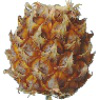

In [ ]:
img

In [ ]:
img=image.load_img(r"/content/drive/MyDrive/CNN/Dataset/TEST_SET/PINEAPPLE/125_100.jpg",target_size=(64,64))

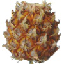

In [ ]:
img

In [ ]:
x=image.img_to_array(img)

In [ ]:
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [ ]:
x=np.expand_dims(x,axis=0)

In [ ]:
x

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [ ]:
pred = model.predict

In [ ]:
pred

<bound method Model.predict of <keras.engine.sequential.Sequential object at 0x7f94abfd7c10>>

In [ ]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

44/44 [==============================] - 3s 60ms/step


In [ ]:
predict_x

array([[0.25227112, 0.17414774, 0.15219809, 0.20493415, 0.21644896],
       [0.26760292, 0.1759095 , 0.15206912, 0.19424875, 0.21016978],
       [0.26474723, 0.165203  , 0.14452063, 0.20434381, 0.2211853 ],
       ...,
       [0.24550524, 0.1721549 , 0.16282505, 0.21065485, 0.20885986],
       [0.25395462, 0.1735253 , 0.16055605, 0.20655352, 0.20541045],
       [0.24495909, 0.15889102, 0.16927534, 0.20705006, 0.21982446]],
      dtype=float32)

In [ ]:
classes_x

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
x_test.class_indices

{'TEST_SET': 0}

In [ ]:
index=['APPLE','BANANA','ORANGE','WATERMELON','PINEAPPLE']

In [ ]:
result=str(index[classes_x[0]])

In [ ]:
result

'PINEAPPLE'

Build Python Code

In [244]:
from flask import Flask,render_template,request
# Flask-It is our framework which we are going to use to run/serve our application.
#request-for accessing file which was uploaded by the user on our application.
import os
import numpy as np #used for numerical analysis
from tensorflow.keras.models import load_model#to load our trained model
from tensorflow.keras.preprocessing import image
import requests

Creating our flask application and loading our model by using the load_model method

In [245]:
app = Flask(__name__,template_folder="templates") # initializing a flask app
# Loading the model
model=load_model('nutrition.h5')
print("Loaded model from disk")

Loaded model from disk


Routing To The Html Page

In [246]:
@app.route('/')# route to display the home page
def home():
    return render_template('home.html')

In [247]:
@app.route('/image1',methods=['GET','POST'])# routes to the index html
def image1():
    return render_template("image.html")

In [265]:
@app.route('/predict',methods=['GET', 'POST'])# route to show the predictions in a web UI
def launch():
    if request.methods=='POST':
        f=request.files['file'] #requesting the file
        basepath=os.path.dirname('__file__')#storing the file directory
        filepath=os.path.join(basepath,"uploads",f.filename)#storing the file in uploads folder
        f.save(filepath)#saving the file
        img=image.load_img(filepath,target_size=(64,64)) #load and reshaping the image
        x=image.img_to_array(img)#converting image to an array
        x=np.expand_dims(x,axis=0)#changing the dimensions of the image
        pred=np.argmax(model.predict(x), axis=1)
        print("prediction",pred)#printing the prediction
        index=['APPLES','BANANA','ORANGE','PINEAPPLE','WATERMELON']
        result=str(index[pred[0]])
        x=result
        print(x)
        result=nutrition(result)
        print(result)
        return render_template("0.html",showcase=(result))

In [267]:
pred = model.predict

In [268]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

44/44 [==============================] - 3s 65ms/step


In [269]:
index=['APPLE','BANANA','ORANGE','WATERMELON','PINEAPPLE']

In [270]:
result=str(index[classes_x[0]])


In [272]:
x=result

In [273]:
print(x)

APPLE


In [276]:

print(result)

APPLE


In [263]:
import http.client

conn = http.client.HTTPSConnection("calorieninjas.p.rapidapi.com")

headers = {
    'X-RapidAPI-Key': "e5805fbf62mshf8d7308c0600c2dp197087jsn93407e3cce35",
    'X-RapidAPI-Host': "calorieninjas.p.rapidapi.com"
    }

conn.request("GET", "/v1/nutrition?query=Apples", headers=headers)

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))

{"items": [{"sugar_g": 10.3, "fiber_g": 2.4, "serving_size_g": 100.0, "sodium_mg": 1, "name": "apples", "potassium_mg": 11, "fat_saturated_g": 0.0, "fat_total_g": 0.2, "calories": 53.4, "cholesterol_mg": 0, "protein_g": 0.3, "carbohydrates_total_g": 13.8}]}


In [264]:
import requests

url = "https://calorieninjas.p.rapidapi.com/v1/nutrition"

querystring = {"query":"apples"}

headers = {
	"X-RapidAPI-Key": "e5805fbf62mshf8d7308c0600c2dp197087jsn93407e3cce35",
	"X-RapidAPI-Host": "calorieninjas.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

{"items": [{"sugar_g": 10.3, "fiber_g": 2.4, "serving_size_g": 100.0, "sodium_mg": 1, "name": "apples", "potassium_mg": 11, "fat_saturated_g": 0.0, "fat_total_g": 0.2, "calories": 53.4, "cholesterol_mg": 0, "protein_g": 0.3, "carbohydrates_total_g": 13.8}]}


In [277]:
if __name__ == "__main__":
   # running the app
    app.run(debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
